<a href="https://colab.research.google.com/github/Magguire/Magguire/blob/main/ip_week_2_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the State of Financial Inclusion in Kenya, Uganda, Tanzania and Rwanda

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> How we can predict which individuals are most likely to have or use a bank account

### b) Defining the Metric for Success

> After proper data cleaning, removing relevant outliers and performing appropriate reduction techniques, we shall perform univariate, bivariate and multivariate exploratory data analysis in order to find the necessary variables that contribute to individuals having or using a bank account. 

### c) Understanding the context 

> This study is for the financial banking sector which will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### d) Recording the Experimental Design

> . Read in relevant data for the study.


> . Understand the data by getting more information about our data i.e, how many rows and columns does our data have, are the datatypes appropriate or do we need to convert them to the appropriate datatype, are the column names appropriate.


> . Validate the records in our dataset.


> . Under data preparation, we perform data cleaning procedures, such as, removing outliers, checking for anomalies, checking and dealing with missing data, deleting duplicates if necessary and removing whitespaces.


> . Perform univariate, bivariate and multivariate data anaysis to unravel the relationship between our variables.

> . Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis so as to increase the reliability of our results.   

> . Challenge your solution by providing insights on how you can make improvements.

> . Answer follow up questions to review the appropriateness of our solution



### e) Data Relevance

> Our dataset should contain relevant financial banking records from Uganda, Kenya, Tanzania and Uganda. 
The data should also be recent and up to date. 

## 2. Reading the Data

In [499]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = http://bit.ly/FinancialDataset 
# ---
#Variable Definitions: http://bit.ly/VariableDefinitions 

# importing our libraries for data loading data and dataset manipulation 
import pandas as pd

#
import numpy as np

# importing our libraries for modelling
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('http://bit.ly/FinancialDataset')

# Loading the variable definitions file
definitions = pd.read_csv('http://bit.ly/VariableDefinitions')

In [500]:
# dataset definitions
definitions.head()

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"


## 3. Checking the Data

In [501]:
# Determining the no. of records in our dataset
#
df.shape

(23524, 13)

In [502]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [503]:
# Previewing the bottom of our dataset
# 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [504]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number. 

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

In [505]:
# we are going to validate the statement that across Kenya, Rwanda, Tanzania, and Uganda
# only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.
positive = df[df['Has a Bank account'] == 'Yes'] 
positive_percent = (positive.shape[0]/df.shape[0]) * 100 
positive_percent

# 14.066485291617074% of the sample dataset have a bank account which is a value close to 13.9% which
# implies that our dataset is valid



14.066485291617074

## 5. Tidying the Dataset

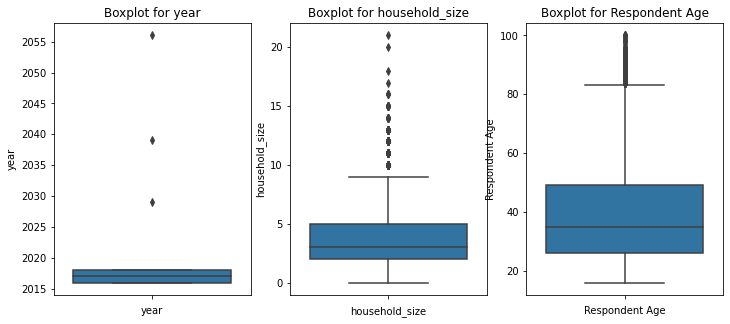

In [506]:
# Checking for Outliers
#

columns= []
for col in df.columns:
   if df[col].dtypes in ['float64', 'int64']:
     columns.append(col)
      
fig, ax = plt.subplots(ncols=len(columns), figsize=(12,5))

for i, column in enumerate(columns):
         sns.boxplot(y=df[column], ax=ax[i])
         ax[i].set_title('Boxplot for {}'.format(column), fontsize=12)
         ax[i].set_xlabel(column)

plt.show()    


In [507]:
# Checking for Anomalies
#

# We have future years on our data i.e 2029, 2056, 2039

df['year'].unique()

# Lets check how many records there are for each
future = df[(df['year'] == 2029) | (df['year'] == 2039) | (df['year'] == 2056)]

# convert this to percentage of the total
future_percent = (future.shape[0]/df.shape[0]) * 100
future_percent
# this is only 0.0127% of the whole dataset hence we can drop these rows

# Dropping rows function
def drop_row(row):
  df.drop(df.loc[df['year'] == row].index , inplace=True)

rows = [2029, 2039, 2056]

for row in rows:
   drop_row(row)
   

In [508]:
# Identifying the Missing Data
#
df.isnull().sum()


country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [509]:
# Check percentage of missing data in each column
def missing_percent(column):
  return (df[column].isna().sum()/df.shape[0]) * 100

for column in df.columns:
  print(column, ':', missing_percent(column))  

# The missing values all cover a very small percentage of the whole data.
# We can choose to drop the rows with this missing values or fill them using 
# appropriate methods.

country : 0.05952127885719145
year : 0.0
uniqueid : 0.0
Has a Bank account : 0.15305471706134943
Type of Location : 0.06377279877556227
Cell Phone Access : 0.046766719102078996
household_size : 0.1190425577143829
Respondent Age : 0.1445516772246078
gender_of_respondent : 0.1445516772246078
The relathip with head : 0.01700607967348327
marital_status : 0.13604863738786616
Level of Educuation : 0.12329407763275371
Type of Job : 0.12754559755112455


In [510]:
# Dealing with the Missing Data
#
# Fill null values for household_size, respondent age(numeric datatypes) with the mean
df['household_size'] = df['household_size'].fillna(df['household_size'].mean())
df['Respondent Age'] = df['Respondent Age'].fillna(df['Respondent Age'].mean())

# For categorical data we shall fill using appropriate methods for each
# since countries were filled systematically, we shall use forward fill

# create a funtion to forward fill
def fillna_ffill(column):
    df[column] = df[column].fillna(method='ffill')

fillna_ffill('country')
# we shall also apply the same for Type of Location, The relathip with head, marital_status,
# Level of Educuation, Type of Job and gender_of_respondent

columns = ['Type of Location', 'The relathip with head', 'marital_status', 'Level of Educuation', 'Type of Job',
 'gender_of_respondent']
for column in columns:
   fillna_ffill(column)

# we shall fill the close answer questions with ffill
fillna_ffill('Has a Bank account')  
fillna_ffill('Cell Phone Access')

In [511]:
# More data cleaning procedures
#
# Check for duplicates 
df.duplicated().sum()

# There are no duplicates in our data

# check for whitespaces
columns = [column for column in df.columns]
if df[column].dtype == 'O':
     df[column] = df[column].str.replace(' ', '')
     

In [512]:
# converting household size and respondent age to int as they can only be whole numbers.

def float_to_int(data):
  return data.astype(int)

columns = ['household_size', 'Respondent Age']

for column in columns:
    df[column] =  float_to_int(df[column])

In [513]:
# Renaming columns for uniformity
columns = []
for column_name in df.columns:
   column_name = column_name.lower().replace(' ','_')
   columns.append(column_name)

df.columns  = columns
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

## 6. Exploratory Analysis

### <font color='violet'>Univariate Analysis</font>

In [514]:
# Ploting the univariate summaries and recording our observations
#
# Lets first describe our data
df.describe(include='all')

# The years included in our dataset are 2016 to 2018
# Since there are more than 14000 duplicated values for uniqueid with different attributes,
# we are going to assume that the data belongs to different people.
# Average household size is 4
# Average respondent age is 38 and age ranges from 16 fo 100
# Household size ranges from 0(leaves alone) to a maximum of 21. 

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
count,23521,23521.000000,23521,23521,23521,23521,23521.000000,23521.000000,23521,23521,23521,23521,23521
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8734,NaN,4,20197,14342,17449,NaN,NaN,13875,12832,10737,12782,6437
mean,NaN,2016.975894,NaN,NaN,NaN,NaN,3.680923,38.804685,NaN,NaN,NaN,NaN,NaN
std,NaN,0.847348,NaN,NaN,NaN,NaN,2.278787,16.508180,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [515]:
# Filter the data to include individuals with bank accounts
bank =  df[df['has_a_bank_account'] == 'Yes']
bank.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,uniqueid_12,Yes,Rural,Yes,3,69,Male,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,uniqueid_18,Yes,Rural,Yes,6,27,Female,Head of Household,Married/Living together,Secondary education,Self employed


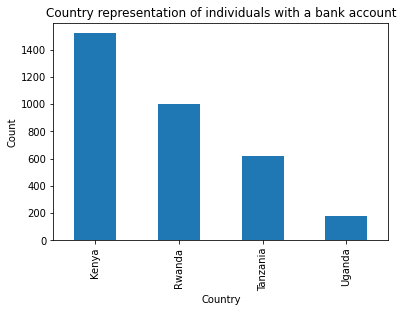

In [516]:
# checking country count for individuals with bank accounts from our sample

bank.country.value_counts().plot.bar()

# Label graph
plt.title('Country representation of individuals with a bank account')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# Kenya has the highest ratio of individuals that have a bank account in our sample data.
# Most Kenyans are therefore highly likely to open a bank account that individuals in other countries.

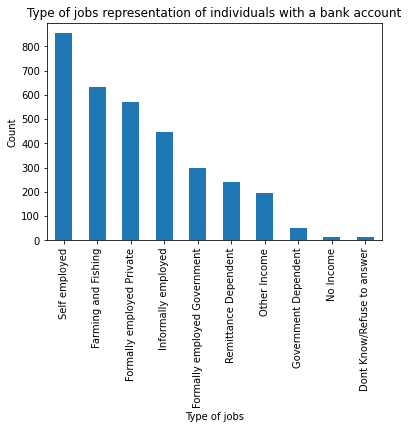

In [517]:
# Job Vs owns a bank account

bank.type_of_job.value_counts().plot.bar()

# Label graph
plt.title('Type of jobs representation of individuals with a bank account')
plt.xlabel('Type of jobs')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

# The highest number of people with a bank account are self employed from our dataset.
# The type of jo target should be these people. 

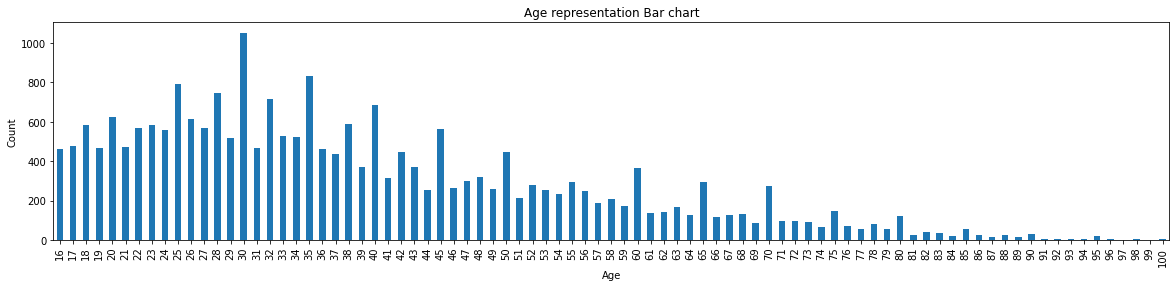

In [562]:
# Get ages represented in our dataset from the maximum age to the minimum
df['respondent_age'].value_counts().sort_index().plot.bar(figsize=(20,4))
plt.title('Age representation Bar chart')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# Ages range from 16 to 100
# The age with the highest count in our sample data is age 30 with over 1000 individuals

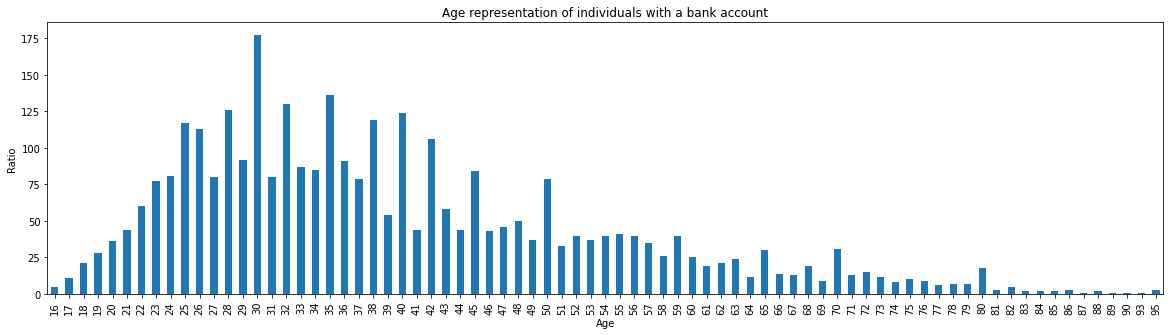

In [519]:
# Age likely to have bank account
plt.figure(figsize=(20,5))
bank.respondent_age.value_counts().sort_index().plot.bar()


# Label graph

plt.title('Age representation of individuals with a bank account')
plt.xlabel('Age')
plt.xticks(rotation='vertical')
plt.ylabel('Ratio')
plt.show()


# Ages between 16 and 50 are the individuals who are likely to have bank accounts.
# The youth should be targeted when creating awareness on banking 

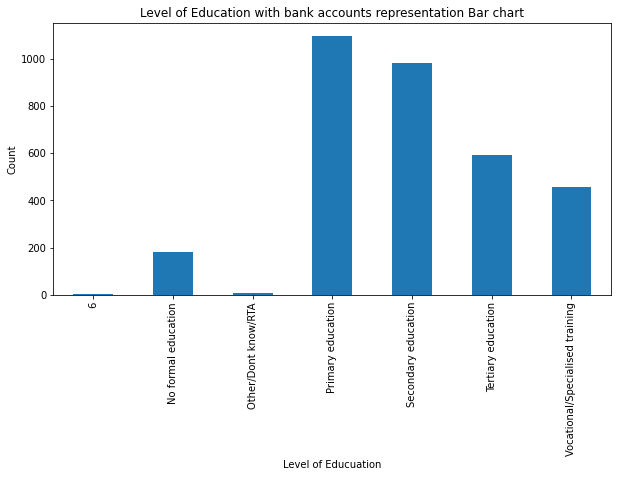

In [564]:
# Level of education with bank accounts representation
plt.figure(figsize=(10,5))
bank.level_of_educuation.value_counts().sort_index().plot.bar()

# Labelling the graph
plt.title('Level of Education with bank accounts representation Bar chart')
plt.xlabel('Level of Educuation')
plt.ylabel('Count')
plt.show()

# The largest section of the population in our dataset with bank accounts only have a primary level certificate as the
# highest education level attained. The least number of people fall in the 'other' group. 


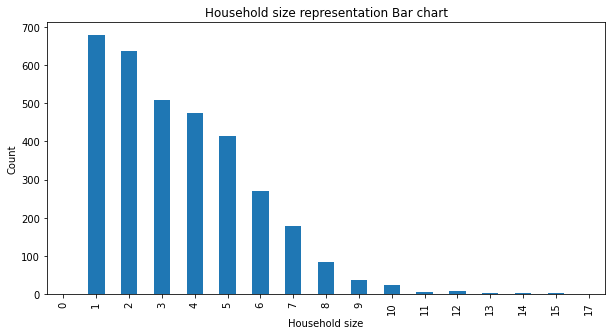

In [521]:
# Household size likely to have a bank account
plt.figure(figsize=(10,5))
bank.household_size.value_counts().sort_index().plot.bar()

# Labelling the graph
plt.title('Household size representation Bar chart')
plt.xlabel('Household size')
plt.ylabel('Count')
plt.show()

# The fewer the household size the higher chance an individual has to have a bank account

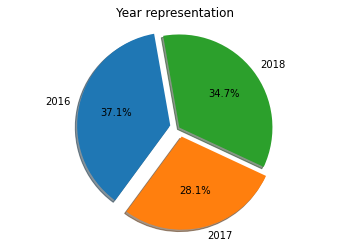

In [522]:
# Representation of data available for the years in our data
year = df.groupby(['year'], as_index=False)['uniqueid'].count()
labels = year['year']
count = year['uniqueid']
explode = (0.1, 0.1, 0)
plt.pie(count, labels=labels, autopct="%1.1f%%",  explode=explode, shadow=True, startangle=100)
plt.axis('equal')
plt.title('Year representation')
plt.show()
# The data was mostly collected in 2018. Hence mos of our data is very recent 

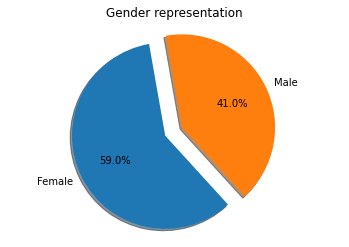

In [523]:
# Representation of data available for the gender 
gender = df.groupby(['gender_of_respondent'], as_index=False)['uniqueid'].count()
labels = gender['gender_of_respondent']
count = gender['uniqueid']
explode = (0.1, 0.1)
plt.pie(count, labels=labels, autopct="%1.1f%%",  explode=explode, shadow=True, startangle=100)
plt.axis('equal')
plt.title('Gender representation')
plt.show()
# There are more female than male in our dataset  

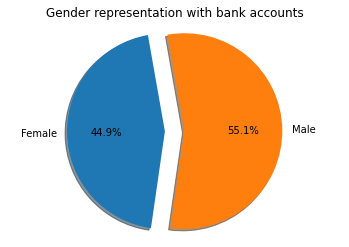

In [565]:
# Representation of data available for the gender with bank accounts

gender = bank.groupby(['gender_of_respondent'], as_index=False)['uniqueid'].count()
labels = gender['gender_of_respondent']
count = gender['uniqueid']
explode = (0.1, 0.1)

# Plotting pie chart
plt.pie(count, labels=labels, autopct="%1.1f%%",  explode=explode, shadow=True, startangle=100)
plt.axis('equal')
plt.title('Gender representation with bank accounts')
plt.show()

# Despite the fact that there are more female than male in our dataset, there are more males with a bank account than females
# This implies that the male gender are likely to open a bank account 

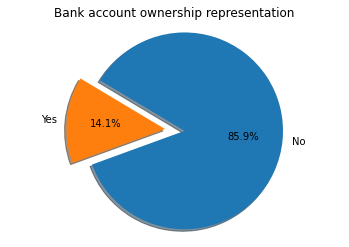

In [525]:
# Representation of data available for Bank account ownership
bank = df.groupby(['has_a_bank_account'], as_index=False)['uniqueid'].count()
labels = bank['has_a_bank_account']
count = bank['uniqueid']
explode = (0.1, 0.1)
plt.pie(count, labels= labels, autopct="%1.1f%%",  explode=explode, shadow=True, startangle=200)
plt.axis('equal')
plt.title('Bank account ownership representation')
plt.show()

# Most people in dataset do not have a bank account  

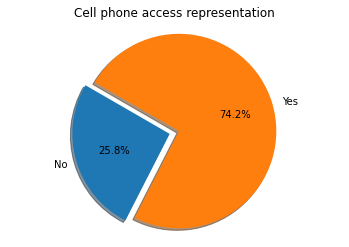

In [526]:
# Cell phone access 
cell = df.groupby(['cell_phone_access'], as_index=False)['uniqueid'].count()
labels = cell['cell_phone_access']
count = cell['uniqueid']
explode = (0.1, 0)
plt.pie(count, labels= labels, autopct="%1.1f%%",  explode=explode, shadow=True, startangle=150)
plt.axis('equal')
plt.title('Cell phone access representation')
plt.show()
# Majority of the population in our dataset have an access to a cell phone

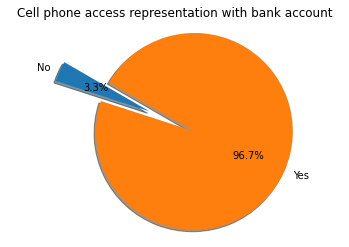

In [566]:
# Cell phone access with bank account

bank =  df[df['has_a_bank_account'] == 'Yes']
cell = bank.groupby(['cell_phone_access'], as_index=False)['uniqueid'].count()
labels = cell['cell_phone_access']
count = cell['uniqueid']
explode = (0, 0.5)
plt.pie(count, labels= labels, autopct="%1.1f%%",  explode=explode, shadow=True, startangle=150)
plt.axis('equal')
plt.title('Cell phone access representation with bank account')
plt.show()

# Most people with bank accounts have  cellphone access 


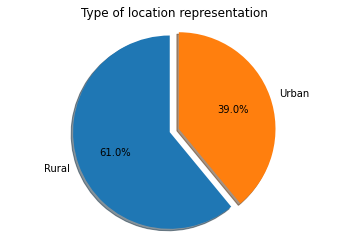

In [534]:
# Type of location representation
location = df.groupby(['type_of_location'], as_index=False)['uniqueid'].count()
labels = location['type_of_location']
count =  location['uniqueid']
explode = (0.1, 0)
plt.pie(count, labels= labels, autopct="%1.1f%%",  explode=explode, shadow=True, startangle=90)
plt.axis('equal')
plt.title('Type of location representation')
plt.show()
# Majority of the population in our dataset lives in the rural areas. 

### <font color='violet'>Bivariate Analysis</font>

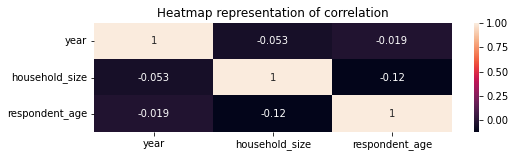

In [535]:
# Plotting the univariate summaries and recording our observations
# Correlation between variables
plt.figure(figsize=(8,2))
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap representation of correlation')
plt.show()

# All variables are negatively weakly correlated to one another.
# This implies that there is no direction or trend of any variable that affects another.


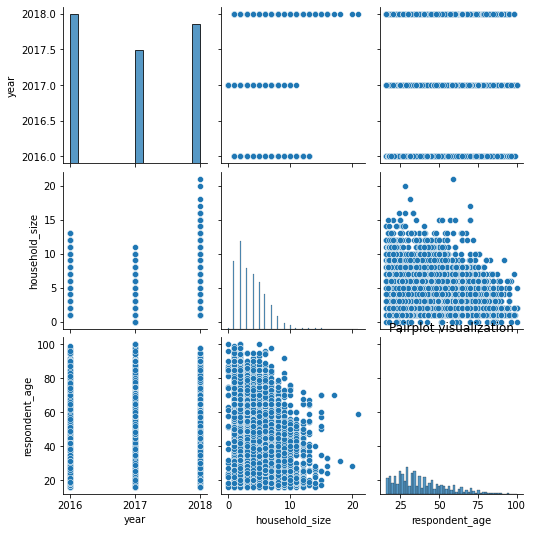

In [536]:
# Plotting a pairplot 
sns.pairplot(df) 
plt.title('Pairplot visualization')
plt.show()

# There are no visible collinearity/trends between variables 

Text(0.5, 0, 'Location')

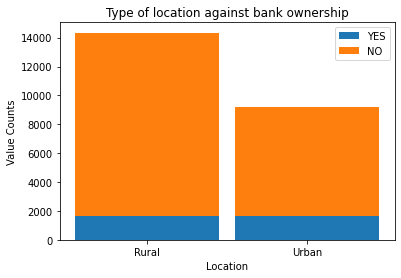

In [537]:
# Plot a stacked bar chart for type of location Vs has a bank account

def filter_val(columns, values):
  return df[(df[columns[0]] == values[0]) & (df[columns[1]]== values[1])]

columns = ['type_of_location', 'has_a_bank_account']
first = ['Rural', 'Yes']
second = ['Rural', 'No']
third = ['Urban', 'Yes']
fourth = ['Urban', 'No']
rural_yes =  filter_val(columns,first)
rural_no = filter_val(columns,second)
urban_yes =  filter_val(columns,third)
urban_no =  filter_val(columns,fourth)

vals1 = [rural_yes, urban_yes]
vals2 = [rural_no, urban_no]

yes = []
no = []
for val in vals1:
   yes.append(len(val['type_of_location']))

for val in vals2:
   no.append(len(val['type_of_location']))


X = ['Rural', 'Urban']
plt.bar(X, yes, label='YES' , width=0.9)
plt.bar(X, no, label='NO', bottom=yes, width=0.9)

# labelling our stacked barplot
plt.title('Type of location against bank ownership')
plt.legend(loc='upper right')
plt.ylabel('Value Counts')
plt.xlabel('Location')

# Our data contains an equal number of people in Rural and Urban areas with a bank account.
# There is an equal chance that a person in the rural area opens a bank account with that
# of a person in an urban area.
# This implies that they should both be targeted equally.

Text(0.5, 0, 'Gender')

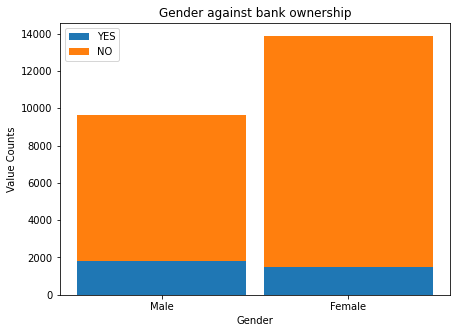

In [538]:
# Plot a stacked bar chart for gender Vs has a bank account

# Refine our column names and use the same function to filter our data
columns = ['gender_of_respondent', 'has_a_bank_account']
first = ['Male', 'Yes']
second = ['Male', 'No']
third = ['Female', 'Yes']
fourth = ['Female', 'No']
male_yes =  filter_val(columns,first)
male_no = filter_val(columns,second)
female_yes =  filter_val(columns,third)
female_no =  filter_val(columns,fourth)

vals1 = [male_yes, female_yes]
vals2 = [male_no, female_no]

yes = []
no = []
for val in vals1:
   yes.append(len(val['gender_of_respondent']))

for val in vals2:
   no.append(len(val['gender_of_respondent']))


X = ['Male', 'Female']

plt.figure(figsize=(7,5))
plt.bar(X, yes, label='YES', width=0.9)
plt.bar(X, no, label='NO', bottom=yes, width=0.9)

# labelling our stacked barplot
plt.title('Gender against bank ownership')
plt.legend(loc='upper left')
plt.ylabel('Value Counts')
plt.xlabel('Gender')
# There are more male with bank accounts compared to female despite the general
# low value of individuals with bank accounts. The male are more likely to
# open bank accounts compared to female hence this should be the target population.

Text(0.5, 0, 'Country')

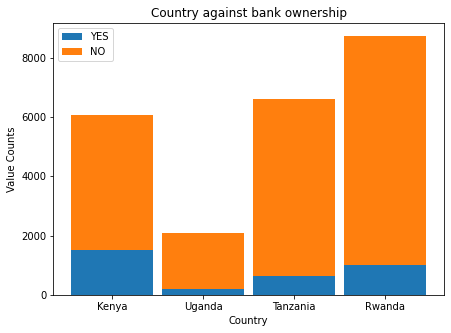

In [539]:
# Plot a stacked bar chart for country Vs has a bank account

# Refine our column names and use the same function to filter our data
columns = ['country', 'has_a_bank_account']
first = ['Kenya', 'Yes']
second =  ['Kenya', 'No']

third =  ['Uganda', 'Yes']
fourth = ['Uganda', 'No']
 
fifth = ['Tanzania', 'Yes']
sixth = ['Tanzania', 'No']

seventh = ['Rwanda', 'Yes']
eighth = ['Rwanda', 'No']

ke_yes =  filter_val(columns,first)
ke_no = filter_val(columns,second)

ug_yes =  filter_val(columns,third)
ug_no =  filter_val(columns,fourth)

tz_yes = filter_val(columns,fifth)
tz_no = filter_val(columns,sixth)

rw_yes = filter_val(columns,seventh)
rw_no = filter_val(columns,eighth)

vals1 = [ke_yes, ug_yes, tz_yes, rw_yes]
vals2 = [ke_no, ug_no, tz_no, rw_no]

yes = []
no = []
for val in vals1:
   yes.append(len(val['country']))

for val in vals2:
   no.append(len(val['country']))


X = ['Kenya', 'Uganda', 'Tanzania', 'Rwanda']

plt.figure(figsize=(7,5))
plt.bar(X, yes, label='YES', width=0.9)
plt.bar(X, no, label='NO', bottom=yes, width=0.9)

# labelling our stacked barplot
plt.title('Country against bank ownership')
plt.legend(loc='upper left')
plt.ylabel('Value Counts')
plt.xlabel('Country')

# Individuals in Kenya are highly likely to hava a bank account than in other countries. 

In [540]:
# Using t_test to check if there is a relationship between number of households in rural areas and in urban areas
from scipy import stats
# Let us first use the researchpy function to get the summary cont
!pip install researchpy
import researchpy as rp
rp.summary_cont(df.groupby('type_of_location')['household_size']) 
# For t_test to be conducted, the number of non missing values(N) need to be the same



,N,Mean,SD,SE,95% Conf.,Interval
type_of_location,,,,,,
Rural,14342,4.1818,2.3144,0.0193,4.1440,4.2197
Urban,9179,2.8982,1.9832,0.0207,2.8577,2.9388


In [543]:
# split the data into rural and urban dataframes
rural  = df[df['type_of_location'] == 'Rural']
urban = df[df['type_of_location'] == 'Urban']

# Ratio for unequal independent samples for t_test is <=1.5. Let's check for this
ratio = len(rural['household_size'])/len(urban['household_size'])
ratio
# The ratio value is above 1.5 meaning his condition isn't satisfied.
# Because of this, our t_test results may not be reliable. Hence we shall use the welch's t Test

1.5624795729382286

In [542]:
# Check for equal variance between the two groups.
stats.levene(rural['household_size'], urban['household_size'])
# The p_value < 0.0001 implying unequal variances


LeveneResult(statistic=460.19021505779, pvalue=4.0716904596486477e-101)

In [544]:
# Checking for normality of the individual dataframes.
stats.shapiro(rural['household_size']), stats.shapiro(urban['household_size'])
# They both violate the assumption of normality where p>0.05. The warning 
# statement however advices that an N<=5000 would give more accurate p_value results.
# We shall therefore sample our data to sample size of 5000 for more accurate results.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


((0.9409583806991577, 0.0), (0.8312174081802368, 0.0))

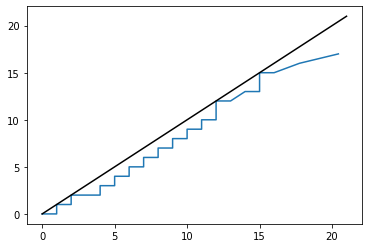

In [545]:
# Checking for normality using plots
# Calculate quantiles
test1 = rural['household_size'].tolist()
test2 = urban['household_size'].tolist()
test1.sort()
quantile_levels1 = np.arange(len(test1),dtype=float)/len(test1)

test2.sort()
quantile_levels2 = np.arange(len(test2),dtype=float)/len(test2)

#Use the smaller set of quantile levels to create the plot
quantile_levels = quantile_levels2

#We already have the set of quantiles for the smaller data set
quantiles2 = test2

#We find the set of quantiles for the larger data set using linear interpolation
quantiles1 = np.interp(quantile_levels,quantile_levels1,test1)

#Plot the quantiles to create the qq plot
import pylab
pylab.plot(quantiles1,quantiles2)

#Add a reference line
maxval = max(test1[-1],test2[-1])
minval = min(test1[0],test2[0])
pylab.plot([minval,maxval],[minval,maxval],'k-') 

The q-q plot above implies that the data is not normally distributed. But since our data contains N>5000, we can proceed to perform t_test.

In [546]:
# Perform t_test
stats.ttest_ind(rural['household_size'], urban['household_size'])
# Since the p_value < 0.05 = 0.0, we shall reject the null hypohesis, i.e there is a 
# significant difference in the household size in rural areas from urban areas

Ttest_indResult(statistic=43.82659052751324, pvalue=0.0)

### <font color='violet'>Multivariate Analysis</font>

In [547]:
# Data Reduction
#
# Using pca

# Split the data into labelled data/ target and unlabelled data
columns = ['household_size']
X = df[columns]
y = df['has_a_bank_account'] 
# df.drop(columns, axis=1)

In [548]:
# Split the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

In [549]:
# We now standardize our data to be on the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [550]:
# We now perform pca on the training dataset

# import pca
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [551]:
# Get the variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Display explained_variance
explained_variance

array([1.])

In [552]:
# Choosing number of principal components=1.(n_components=1)
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## 7. Implementing the Solution

We can therefore predict individuals who are most likely to have or use a bank account by using Principal Component Analysis to reduce the dimensionality of the data, then using the Random Forest Classifier to train and predict the results of our model.

From this model, we are able to predict correctly 85.91% of our data.

In [553]:
# Implementing the Solution
# 
# How we can predict which individuals are most likely to have or use a bank account


In [554]:
# We now use random forest classification for making the predictions.

# importing random forest classification
from sklearn.ensemble import RandomForestClassifier

# Training our model 
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [555]:
# Evaluating the performance of our model
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# From the output that with only one feature, 
# the random forest algorithm results in 85.91% accuracy.

[[4042    0]
 [ 663    0]]
Accuracy 0.859086078639745


We therefore settle on using only one principal component.

## 8. Challenging the solution

To challenge our solution, we shall use a different reduction technique and compare accuracy results.

In [556]:
# Reviewing the Solution 
# 

# Splitting our data into labelled and unlabelled data
columns = ['household_size']
X = df[columns]
y = df['has_a_bank_account'] 

In [557]:
# Splitting our data into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)


In [558]:
# Performing feature scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [559]:
# Performing LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)



In [560]:
# Training this model 
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the test set results for this model
y_pred = classifier.predict(X_test)

In [561]:
# Evaluating the performance of this model
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# The model still results in a 85.91% accuracy hence our implimented solution is correct

[[4042    0]
 [ 663    0]]
Accuracy 0.859086078639745


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes, our data fits our study question

### b). Do we need other data to answer our question?

We do not require another data since our model has been tested for accuracy in a dataset period of 3 years.

### c). Did we have the right question?

Yes, we have the right question captured.